In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

In [4]:
def load_and_preprocess_data():
    
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0

    x_train = x_train.reshape(-1, 32*32*3)
    x_test = x_test.reshape(-1, 32*32*3)

    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)

    return (x_train, y_train), (x_test, y_test)

In [5]:
def create_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, activation='relu', input_shape=(3072,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    return model

In [8]:
def train(model, x_train, y_train):
    
    history = model.fit(x_train, y_train,
    batch_size=256,
    epochs=10,
    validation_split=0.2,
    verbose=1)
    
    return history

In [7]:
(x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
model = create_model()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 298s 2us/step


c:\Users\Abishek\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
history = train(model,x_train,y_train)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.1706 - loss: 2.2350 - val_accuracy: 0.3297 - val_loss: 1.8734
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.3143 - loss: 1.8831 - val_accuracy: 0.3652 - val_loss: 1.7737
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.3446 - loss: 1.8084 - val_accuracy: 0.3788 - val_loss: 1.7325
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.3618 - loss: 1.7683 - val_accuracy: 0.3909 - val_loss: 1.7204
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.3719 - loss: 1.7268 - val_accuracy: 0.4050 - val_loss: 1.6601
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.3885 - loss: 1.6940 - val_accuracy: 0.3989 - val_loss: 1.6755
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - accuracy: 0.3932 - loss: 1.6860 - val_accuracy: 0.4277 - val_loss: 1.6064
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - accuracy: 0.4023 - loss: 1.6609 - 

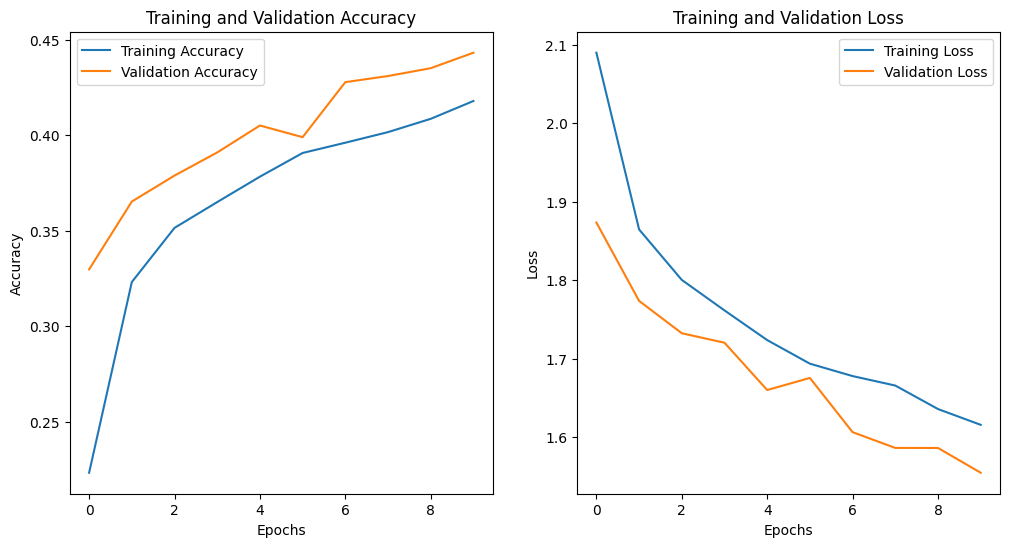

In [10]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import confusion_matrix,classification_report

In [12]:
y_pred = model.predict(x_test)
y_true = tf.argmax(y_test,axis = 1).numpy()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


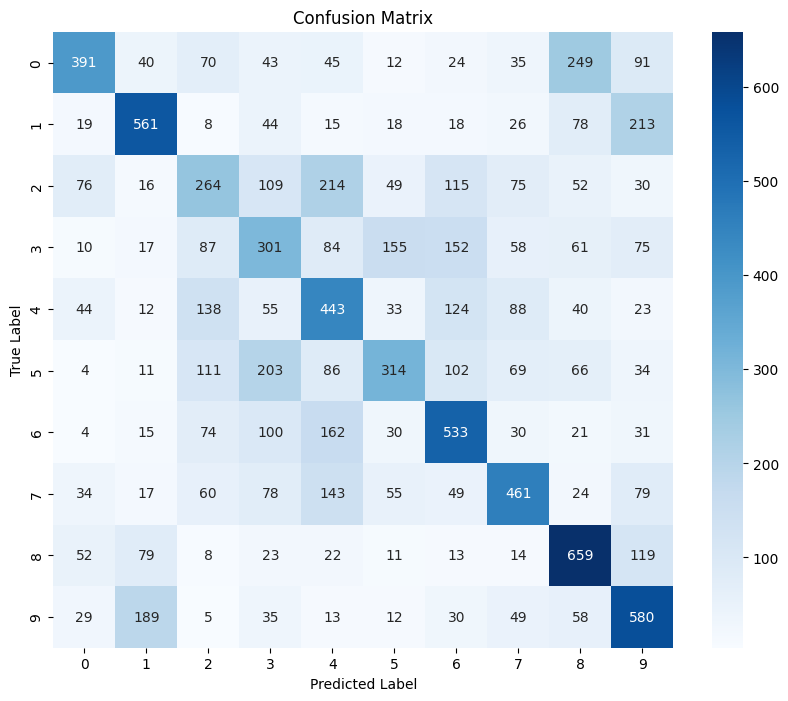

Classification Report:

              precision    recall  f1-score   support

           0       0.59      0.39      0.47      1000
           1       0.59      0.56      0.57      1000
           2       0.32      0.26      0.29      1000
           3       0.30      0.30      0.30      1000
           4       0.36      0.44      0.40      1000
           5       0.46      0.31      0.37      1000
           6       0.46      0.53      0.49      1000
           7       0.51      0.46      0.48      1000
           8       0.50      0.66      0.57      1000
           9       0.45      0.58      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.45     10000
weighted avg       0.45      0.45      0.45     10000



In [13]:
# Predict on the test dataset
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred_classes = tf.argmax(y_pred, axis=1).numpy()

# True class labels
y_true = tf.argmax(y_test, axis=1).numpy()
conf_matrix = tf.math.confusion_matrix(labels=y_true, predictions=y_pred_classes).numpy()
# Plot confusion matrix using Seaborn for better visualization
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
# Generate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(10)])
print("Classification Report:\n")
print(class_report)